In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns


## Load the data

In [ ]:
data=pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
# Check the data

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# Check for missing values

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
# Visualize the data

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

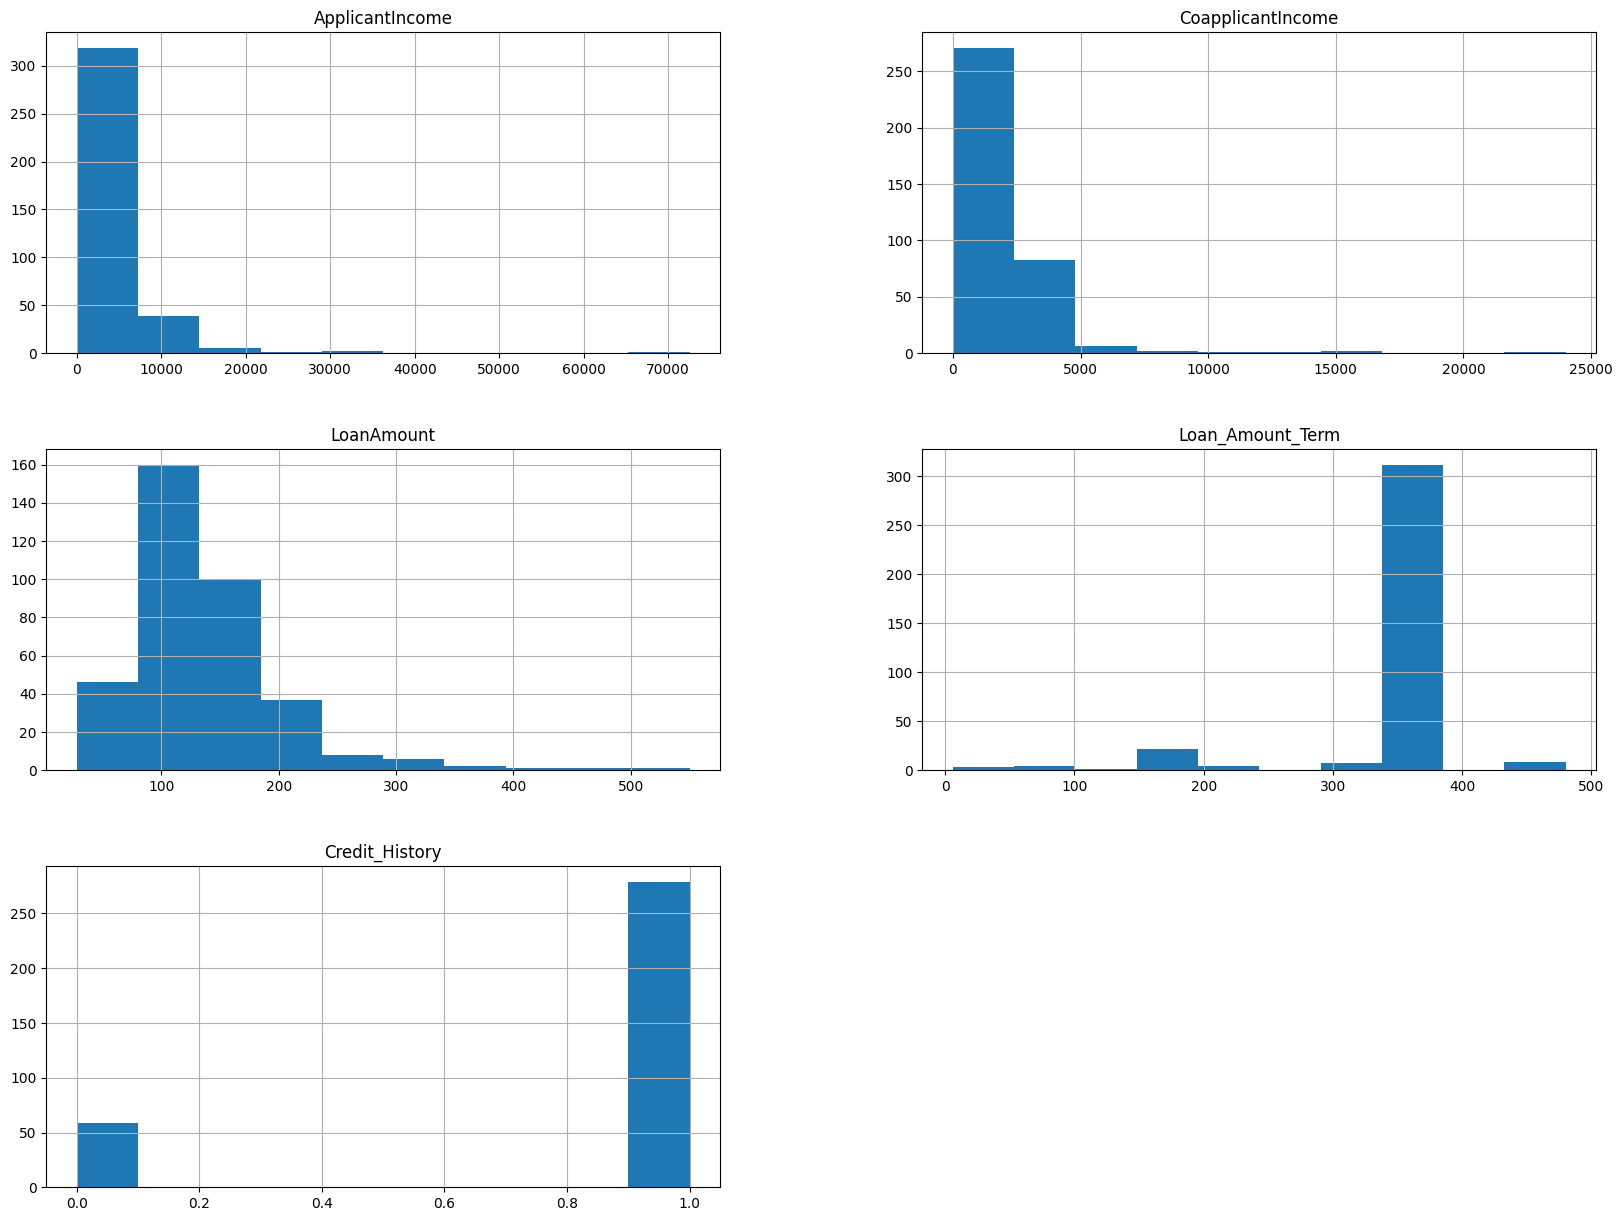

In [ ]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))


In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode())
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode())


In [ ]:
data.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.364778
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
data1 = pd.get_dummies(data)

<ipython-input-48-e207586d2e40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix= data.corr()


<Axes: >

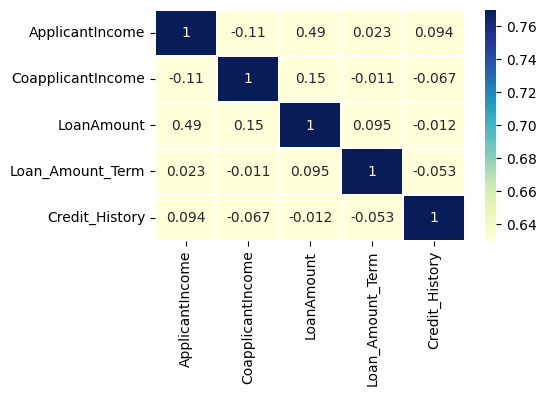

In [48]:
corrmatrix= data.corr()
plt.subplots(figsize=(5,3))
sns.heatmap(corrmatrix,vmin=0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')



In [ ]:
data1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.094083,-0.063556,0.048762,-0.051265,0.051265,-0.103477,-0.002164,0.006067,0.153099,0.136369,-0.136369,-0.078615,0.073010,-0.031106,-0.008305,0.037363
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.066798,-0.082811,0.081655,-0.032548,0.032548,0.021219,0.041307,0.036237,-0.101509,0.057318,-0.057318,0.015917,-0.027065,0.100477,-0.028628,-0.067608
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.011500,-0.073926,0.088827,-0.181838,0.181838,-0.102169,-0.020247,0.129145,0.058764,0.156346,-0.156346,-0.088257,0.077394,0.022093,-0.023109,0.001179
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.052807,0.063144,-0.061075,-0.039140,0.039140,0.042422,0.026096,-0.011250,-0.062944,-0.063804,0.063804,0.043486,-0.025531,-0.004690,-0.015516,0.019334
Credit_History,0.094083,-0.066798,-0.011500,-0.052807,1.000000,-0.034810,0.034418,-0.047435,0.047435,-0.010621,0.073832,-0.028497,-0.069380,0.039349,-0.039349,0.021244,0.102092,-0.032907,-0.042980,0.072256
Gender_Female,-0.063556,-0.082811,-0.073926,0.063144,-0.034810,1.000000,-0.912245,0.265646,-0.265646,0.067587,0.036834,-0.099192,-0.036264,0.033377,-0.033377,0.083345,-0.070422,-0.047890,0.072714,-0.024315
Gender_Male,0.048762,0.081655,0.088827,-0.061075,0.034418,-0.912245,1.000000,-0.306016,0.306016,-0.077293,-0.039605,0.125599,0.038547,-0.008437,0.008437,-0.075373,0.047270,0.050045,-0.090408,0.039214
Married_No,-0.051265,-0.032548,-0.181838,-0.039140,-0.047435,0.265646,-0.306016,1.000000,-1.000000,0.363395,-0.126865,-0.239468,-0.174431,0.049443,-0.049443,0.044493,-0.028374,-0.006513,0.032205,-0.024667
Married_Yes,0.051265,0.032548,0.181838,0.039140,0.047435,-0.265646,0.306016,-1.000000,1.000000,-0.363395,0.126865,0.239468,0.174431,-0.049443,0.049443,-0.044493,0.028374,0.006513,-0.032205,0.024667
Dependents_0,-0.103477,0.021219,-0.102169,0.042422,-0.010621,0.067587,-0.077293,0.363395,-0.363395,1.000000,-0.474124,-0.478969,-0.382748,0.075237,-0.075237,0.054709,0.033376,0.029895,-0.014302,-0.014580


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [37]:
y = data1['LoanAmount']
x = data1.drop('LoanAmount',axis=1)

In [39]:
y

0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64

In [40]:
x

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
log_reg=LogisticRegression()

In [44]:
x_train

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
155,1599,2474,300.0,1.000000,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0
262,3417,738,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
132,3343,1517,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0
222,2896,0,480.0,1.000000,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1
140,4727,0,360.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4463,0,360.0,1.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
106,1596,1760,360.0,0.000000,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
270,1635,2444,360.0,1.000000,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1
348,3418,1380,360.0,1.000000,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1


In [45]:
y_train

155    125.0
262    100.0
132    105.0
222     80.0
140    150.0
       ...  
71      65.0
106    119.0
270     99.0
348    135.0
102    116.0
Name: LoanAmount, Length: 275, dtype: float64

In [46]:
log_reg.fit(x_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_log_pred=log_reg.predict(x_test)


In [ ]:
y_log_pred

array([   0,    0,    0,    0,    0,    0,    0, 2900,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 2900,    0, 2000,
       2690,    0,    0,    0,    0,    0,    0,    0, 2900,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 2900,    0,    0,
          0,    0,    0,    0, 2000,    0,    0,    0, 3967, 2900,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 2900, 2690,    0,    0,
       2900,    0,    0,    0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,y_log_pred)

array([[32,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred, average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))

Accuracy : 0.34782608695652173
 Precision : 0.34782608695652173
Recall : 0.34782608695652173
F1 : 0.34782608695652173


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[32,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred, average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))

Accuracy : 0.34782608695652173
 Precision : 0.34782608695652173
Recall : 0.34782608695652173
F1 : 0.34782608695652173


In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred, average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))


Accuracy : 0.34782608695652173
 Precision : 0.34782608695652173
Recall : 0.34782608695652173
F1 : 0.34782608695652173


KNN MODEL

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

metric_k = []

neighbors = np.arange(3, 15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

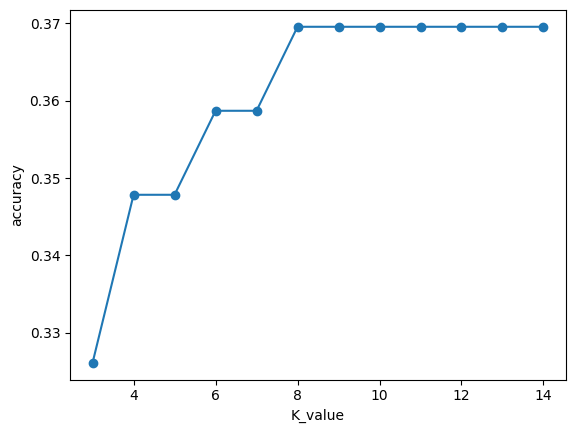

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred_knn)
metric_k.append(accuracy)

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[32,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred,average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))

Accuracy : 0.34782608695652173
 Precision : 0.34782608695652173
Recall : 0.34782608695652173
F1 : 0.34782608695652173


In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))


Accuracy : 0.34782608695652173


In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='sigmoid')
sv_cl.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))

Accuracy : 0.34782608695652173


In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))

NameError: name 'accuracy_score' is not defined